In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
names=['correct','S1/S2','left','right','NA','avg_firing','left_fire','right_fire','S1_fire','S2_fire']
temp=[w for w in range(1,1001)]
for i in range(0,len(temp)):
    names.append(temp[i])

In [46]:
def load_data(filename):
    names=['correct','S1/S2','S3/S4','left','right','NA','avg_firing','left_fire','right_fire','S1_fire','S2_fire']
    temp=[w for w in range(1,1001)]
    for i in range(0,len(temp)):
        names.append(temp[i])
    data=pd.read_csv(filename,header=None,names=names)
    return data

def plot_data(data,filename):
    win=0
    loss=0
    tie=0
    loss_hist=[]
    win_hist=[]
    tie_hist=[]

    flag=0
    for i in range(0,data.shape[0]):
        if flag!=0:
            break;
        if i%100==0:
            loss_hist.append(loss)
            win_hist.append(win)
            tie_hist.append(tie)
            loss=0
            win=0
            tie=0

        if data['correct'].iloc[i]==1:
            win=win+1
            if win==100:
                flag=i
        else:
            if data['NA'].iloc[i]==0:
                loss=loss+1
            else:
                tie=tie+1
    # loss_hist.append(loss)
    # win_hist.append(win)
    # tie_hist.append(tie)
    #plt.style.use('None')
    final_win=[]
    for i in range(0,len(win_hist)):
        final_win.append(win_hist[i]+tie_hist[i])
    plt.title("Percentage accuracy in 100 stimulus intervals")    

    plt.plot(loss_hist,label='incorrect',marker='o')
    plt.plot(win_hist,label='correct',marker='o')
    plt.plot(tie_hist,label='no action',marker='o')
    plt.xticks([w for w in range(0,len(loss_hist),10)],[w*100 for w in range(0,len(loss_hist),10)],rotation=0)
    #plt.plot(final_win,label='win')
    plt.xlabel('Trials')
    plt.ylabel('Accuracy')
    plt.legend(title='Selected Action')
    plt.grid(True)
    plt.savefig((str(filename)+".png"))
    plt.show()

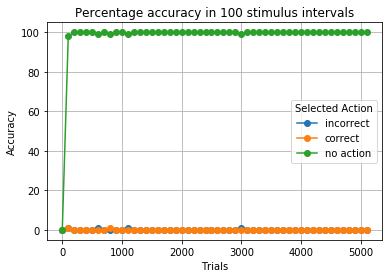

In [47]:
filename='data.csv'
data=load_data(filename)
plot_data(data,filename[:-4])

In [6]:
data.shape

(5194, 1010)

In [43]:
data

,correct,S1/S2,left,right,NA,avg_firing,left_fire,right_fire,S1_fire,S2_fire,...,991,992,993,994,995,996,997,998,999,1000
0,1,4,0,0,1,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0,2,3,0,0,1,4,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
0,1,4,0,0,1,16,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,2,4,0,0,1,57,0,0,0,1,...,2,1,0,0,0,0,0,0,2,0
0,1,3,0,0,1,83,0,0,1,0,...,0,0,0,0,1,0,0,0,4,0
0,2,3,0,0,1,122,0,0,0,1,...,2,1,0,0,0,0,0,0,3,0
0,1,4,0,0,1,53,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
0,2,4,0,0,1,84,0,0,0,1,...,2,1,0,0,0,0,0,0,2,0
0,1,4,0,0,1,57,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
0,2,4,0,0,1,96,0,0,0,1,...,3,1,0,0,0,0,0,0,3,0


In [42]:
data.shape

(5194, 1010)

In [9]:
from scipy.io import loadmat
x = loadmat('intial.mat')
adj=x['post']

In [36]:
names=[w for w in range(1,106)]
action=pd.read_csv("action_neurons.csv", header=None, names=names,index_col=False)
left=[action[i].iloc[0] for i in range(1,51)]
right=[action[i].iloc[0] for i in range(51,101)]
left.sort()
right.sort()
s1=action[101].iloc[0]
s2=action[102].iloc[0]
s3=action[103].iloc[0]

In [39]:
adj[s1-1]

array([382, 471, 308, 302, 474,  92, 116, 534, 138, 730, 752, 786, 535,
       861, 932, 961, 328,  78, 373, 493, 374, 885, 563, 856, 368, 503,
       785, 454, 420, 271,  75, 159, 799, 121,  79, 241,  23, 155,  98,
       281, 306, 145, 232, 325, 157,  36, 860, 165, 710, 791,  66, 483,
       782, 853, 125, 584, 687, 494, 146, 729, 135, 256, 404, 906, 148,
       334, 859, 384, 289, 706, 394, 250, 389, 196, 869, 872, 330, 657,
       486, 242, 849, 747, 261,   4, 191, 597,  25, 314, 104,  29, 949,
       364, 635, 508, 968, 806, 612, 393, 562, 634], dtype=uint16)

In [45]:
count_left=0
count_right=0

In [40]:
def dfs(node):
    if node in left:
        count_left=count_left+1
    if node in right:
        count_right=count_right+1
     
    
    for i in adj[node-1]:
        dfs(i)
    

SyntaxError: unexpected EOF while parsing (<ipython-input-40-a5be84d46a0a>, line 2)

In [44]:
adj

array([[489,  62, 164, ..., 554,  27, 112],
       [  3, 386, 834, ..., 919, 702, 924],
       [522, 504, 258, ..., 282, 913, 166],
       ...,
       [197, 616, 262, ...,  89, 338, 103],
       [100, 225, 607, ..., 229, 118, 689],
       [594, 412, 722, ..., 653, 296, 800]], dtype=uint16)